___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

sns.set_style("white")
sns.set(rc={"axes.facecolor":"#D5CE98","figure.facecolor":"#D5CE98"})
sns.set_context("poster",font_scale = .7)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [4]:
X_train[9].shape

(28, 28)

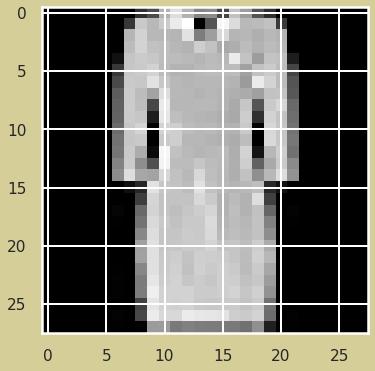

In [5]:
plt.imshow(X_train[9000],cmap='gray')

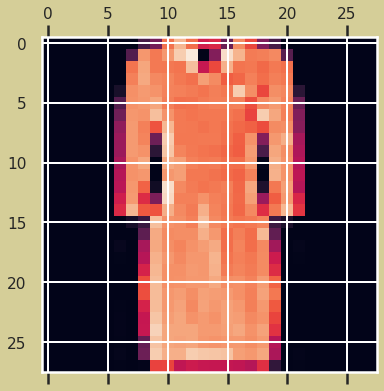

In [6]:
plt.matshow(X_train[9000])

In [7]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [8]:
X_train[9].min()

0

In [9]:
X_train[9].max()

255

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [11]:
X_train[9].min()

0.0

In [12]:
X_train[9].max()

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [13]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [14]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [15]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

In [18]:
y_train[10]

0

In [19]:
Y_train[10]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [43]:
model = Sequential()

model.add(Conv2D(filters=30, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # default olarak stride = 1, padding = valid 

model.add(MaxPool2D(pool_size=(2, 2), strides=(2,2))) # stride = pool size 2*2 ise strideı 2 kabul ediyor, padding = valid

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [44]:
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
early_stop = EarlyStopping(monitor='val_accuracy',mode="max", patience=3, restore_best_weights = True)

In [46]:
model.fit(X_train, Y_train, batch_size=32, epochs=7, validation_data=(X_test,Y_test),callbacks=[early_stop]) 

Epoch 1/7
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3910 - accuracy: 0.8613 - val_loss: 0.3350 - val_accuracy: 0.8820
Epoch 2/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2658 - accuracy: 0.9041 - val_loss: 0.2748 - val_accuracy: 0.9024
Epoch 3/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2262 - accuracy: 0.9191 - val_loss: 0.2613 - val_accuracy: 0.9093
Epoch 4/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2006 - accuracy: 0.9278 - val_loss: 0.2703 - val_accuracy: 0.9120
Epoch 5/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1818 - accuracy: 0.9359 - val_loss: 0.2662 - val_accuracy: 0.9133
Epoch 6/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1653 - accuracy: 0.9415 - val_loss: 0.3015 - val_accuracy: 0.9102
Epoch 7/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1564 - accuracy: 0.9450 - val_loss: 0.2917 - val_accuracy: 0.9142

**TASK 7: Plot values of metrics you used in your model.**

In [47]:
model.metrics_names

['loss', 'accuracy']

In [48]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.391,0.861,0.335,0.882
1,0.266,0.904,0.275,0.902
2,0.226,0.919,0.261,0.909
3,0.201,0.928,0.270,0.912
4,0.182,0.936,0.266,0.913


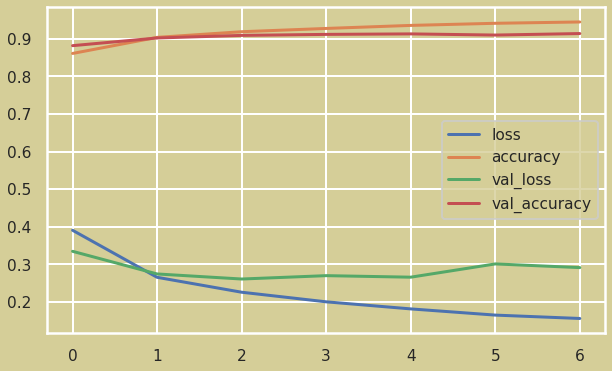

In [49]:
summary.plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [50]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [51]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[1.3921041e-07, 3.5174747e-12, 4.3665818e-10, ..., 2.8829945e-05,
        1.1893112e-07, 9.9989116e-01],
       [2.3523558e-07, 4.8339236e-19, 9.9999976e-01, ..., 8.3935608e-21,
        4.3155253e-15, 4.3278974e-19],
       [1.3505025e-10, 1.0000000e+00, 1.3350122e-15, ..., 9.8830463e-23,
        1.3642016e-12, 2.8906884e-19],
       ...,
       [1.3297050e-09, 5.9944822e-24, 2.2864868e-12, ..., 2.0899385e-12,
        1.0000000e+00, 7.7568419e-17],
       [5.8159880e-11, 1.0000000e+00, 2.9628117e-13, ..., 1.2869363e-18,
        3.9667627e-12, 4.7482791e-13],
       [4.6756250e-05, 7.1729225e-08, 3.0478145e-04, ..., 9.6548133e-02,
        4.4431402e-03, 1.9163653e-03]], dtype=float32)

In [52]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.82      0.91      0.86      1000
           3       0.90      0.94      0.92      1000
           4       0.90      0.82      0.86      1000
           5       0.97      0.98      0.98      1000
           6       0.83      0.69      0.75      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.99      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [54]:
print(confusion_matrix(y_test, y_pred))

[[903   0  20  14   3   1  56   0   3   0]
 [  0 983   1  11   0   1   2   0   2   0]
 [ 20   1 910   6  28   1  32   0   2   0]
 [ 14   7  10 935  13   0  18   0   3   0]
 [  2   0  91  42 823   1  37   0   4   0]
 [  0   0   0   0   0 984   0   6   0  10]
 [134   0  83  33  51   0 690   0   9   0]
 [  0   0   0   0   0  16   0 958   1  25]
 [  3   1   1   2   0   2   0   2 989   0]
 [  1   0   0   0   0   4   0  27   1 967]]


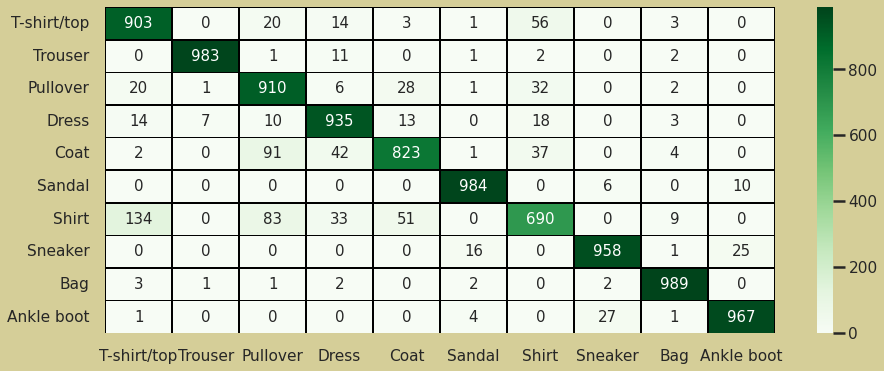

In [55]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
plt.figure(figsize=(15,6))
ax=sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Greens", 
               linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})
ax.set_xticklabels(classes)
ax.set_yticklabels(classes, rotation=0);

In [56]:
(y_test != y_pred).sum()

858

## Prediction

In [57]:
my_pic = X_test[6]

In [58]:
my_pic.shape

(28, 28, 1)

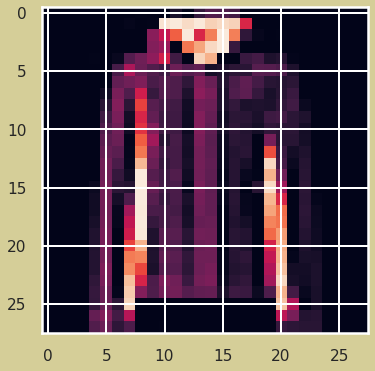

In [59]:
plt.imshow(my_pic.reshape(28,28));

In [60]:
pred_prob = model.predict(my_pic.reshape(1,28,28,1))
pred_prob

1/1 [==============================] - 0s 34ms/step


array([[7.2657542e-09, 4.0703113e-13, 5.8416491e-03, 2.3954246e-13,
        9.9414968e-01, 9.3648284e-11, 8.7091785e-06, 4.9632156e-23,
        2.5128264e-13, 1.2005460e-16]], dtype=float32)

In [61]:
y_pred = np.argmax(pred_prob)
classes[y_pred]

'Coat'

In [62]:
model.save("cnn-cloth.h5")

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___